# TPOT: A Python tool for automating data science

### Notebook by [Abduulah J. Almukallaf]

Please see the [repository README file](https://github.com/Abndo76/Data-Analysis-and-ML-Projects#license) for the licenses and usage terms for the instructional material and code in this notebook. In general, I have licensed this material so that it is as widely useable and shareable as possible.

Below are code samples demonstrating why designing machine learning pipelines is difficult, and how TPOT automates that process.

## License

Please see the [repository README file](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects#license) for the licenses and usage terms for the instructional material and code in this notebook. In general, I have licensed this material so that it is as widely usable and shareable as possible.

## Why automate data science?

### Model hyperparameter tuning is important

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

mnist_data = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/tpot-demo/mnist.csv.gz', sep='\t', compression='gzip')
mnist_data.head()

,class,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


''

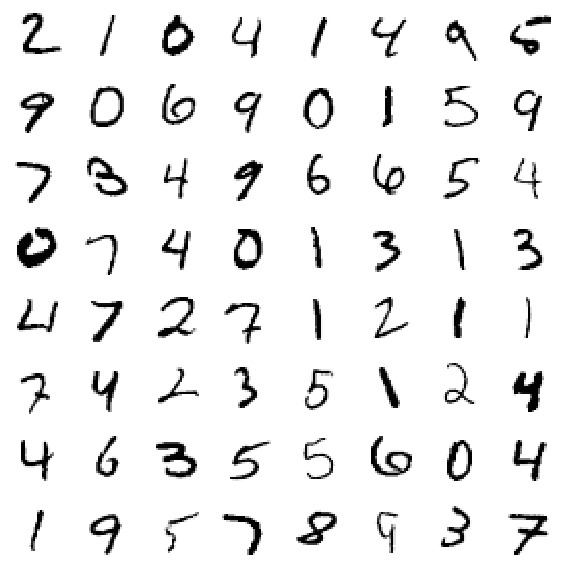

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(8, 8))

for record_num in range(1, 65):
    plt.subplot(8, 8, record_num)
    
    digit_features = mnist_data.iloc[record_num].drop('class').values
    sb.heatmap(digit_features.reshape((28, 28)),
               cmap='Greys',
               square=True, cbar=False,
               xticklabels=[], yticklabels=[])

plt.tight_layout()
;

In [3]:
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=10, n_jobs=-1),
                            X=mnist_data.drop('class', axis=1).values,
                            y=mnist_data.loc[:, 'class'].values,
                            cv=10)

print(cv_scores)
print(np.mean(cv_scores))

[ 0.9420414   0.9620217   0.94888635  0.94000857  0.95071429  0.94427775
  0.94955702  0.94240389  0.93467696  0.95554603]
0.947013394966


In [4]:
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1),
                            X=mnist_data.drop('class', axis=1).values,
                            y=mnist_data.loc[:, 'class'].values,
                            cv=10)

print(cv_scores)
print(np.mean(cv_scores))

[ 0.96445396  0.97829812  0.97015991  0.96629053  0.96828571  0.96170882
  0.97084881  0.96698585  0.96483705  0.97641509]
0.968828385431


### Model selection is important

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

hill_valley_data = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/tpot-demo/Hill_Valley_without_noise.csv.gz', sep='\t', compression='gzip')
hill_valley_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X92,X93,X94,X95,X96,X97,X98,X99,X100,class
0,1317.265789,1315.220951,1312.770581,1309.834252,1306.315588,1302.099102,1297.046401,1290.991646,1283.736109,1275.041652,...,1327.575109,1327.575350,1327.575552,1327.575719,1327.575859,1327.575976,1327.576074,1327.576155,1327.576223,0
1,7329.967624,7379.907443,7441.799231,7518.503422,7613.565031,7731.377492,7877.385707,8058.337694,8282.596458,8560.526497,...,7121.300474,7121.300438,7121.300410,7121.300387,7121.300368,7121.300353,7121.300341,7121.300331,7121.300323,1
2,809.421410,809.780119,810.207191,810.715653,811.321016,812.041748,812.899834,813.921452,815.137768,816.585886,...,807.545134,807.544181,807.543381,807.542709,807.542144,807.541670,807.541272,807.540937,807.540656,1
3,45334.208880,45334.213560,45334.219060,45334.225500,45334.233050,45334.241910,45334.252300,45334.264480,45334.278760,45334.295520,...,47550.921710,47224.457710,46946.072760,46708.686150,46506.259970,46333.645520,46186.452370,46060.936670,45953.905930,1
4,1.810359,1.810359,1.810359,1.810359,1.810359,1.810359,1.810359,1.810359,1.810359,1.810359,...,1.790275,1.794794,1.798296,1.801010,1.803114,1.804744,1.806008,1.806987,1.807746,0


''

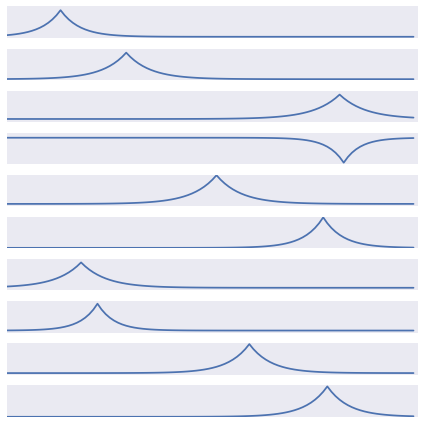

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

with plt.style.context('seaborn-notebook'):
    plt.figure(figsize=(6, 6))
    for record_num in range(1, 11):
        plt.subplot(10, 1, record_num)
        hv_record_features = hill_valley_data.loc[record_num].drop('class').values
        plt.plot(hv_record_features)
        plt.yticks([])
        plt.xticks([])

    plt.tight_layout()
;

In [7]:
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1),
                            X=hill_valley_data.drop('class', axis=1).values,
                            y=hill_valley_data.loc[:, 'class'].values,
                            cv=10)

print(cv_scores)
print(np.mean(cv_scores))

[ 0.6147541   0.63934426  0.62809917  0.60330579  0.6446281   0.5785124
  0.66942149  0.55371901  0.49586777  0.66115702]
0.608880910446


In [8]:
cv_scores = cross_val_score(LogisticRegression(),
                            X=hill_valley_data.drop('class', axis=1).values,
                            y=hill_valley_data.loc[:, 'class'].values,
                            cv=10)

print(cv_scores)
print(np.mean(cv_scores))

[ 1.          1.          0.99173554  1.          1.          1.          1.
  0.99173554  1.          1.        ]
0.998347107438


### Feature preprocessing is important

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import cross_val_score

hill_valley_noisy_data = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/tpot-demo/Hill_Valley_with_noise.csv.gz', sep='\t', compression='gzip')
hill_valley_noisy_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X92,X93,X94,X95,X96,X97,X98,X99,X100,class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


''

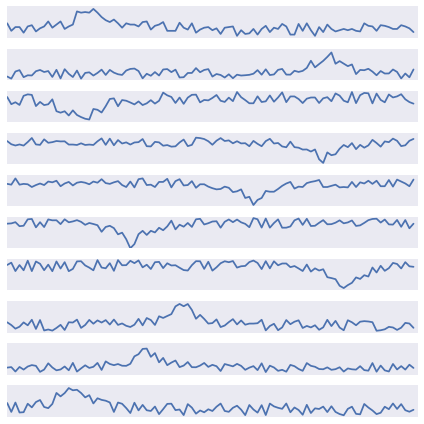

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

with plt.style.context('seaborn-notebook'):
    plt.figure(figsize=(6, 6))
    for record_num in range(1, 11):
        plt.subplot(10, 1, record_num)
        hv_noisy_record_features = hill_valley_noisy_data.loc[record_num].drop('class').values
        plt.plot(hv_noisy_record_features)
        plt.yticks([])
        plt.xticks([])

    plt.tight_layout()
;

In [11]:
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1),
                            X=hill_valley_noisy_data.drop('class', axis=1).values,
                            y=hill_valley_noisy_data.loc[:, 'class'].values,
                            cv=10)

print(cv_scores)
print(np.mean(cv_scores))

[ 0.53278689  0.53278689  0.55737705  0.59016393  0.62295082  0.55737705
  0.58333333  0.55833333  0.6         0.56666667]
0.570177595628


In [12]:
cv_scores = cross_val_score(make_pipeline(PCA(n_components=10), RandomForestClassifier(n_estimators=100, n_jobs=-1)),
                            X=hill_valley_noisy_data.drop('class', axis=1).values,
                            y=hill_valley_noisy_data.loc[:, 'class'].values,
                            cv=10)

print(cv_scores)
print(np.mean(cv_scores))

[ 0.95901639  0.98360656  0.87704918  0.98360656  0.92622951  0.93442623
  0.90833333  0.925       0.95833333  0.96666667]
0.942226775956


# Automating data science with TPOT

In [13]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from tpot import TPOTClassifier

hill_valley_noisy_data = pd.read_csv('https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/tpot-demo/Hill_Valley_with_noise.csv.gz', sep='\t', compression='gzip')
hill_valley_noisy_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X92,X93,X94,X95,X96,X97,X98,X99,X100,class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [14]:
X = hill_valley_noisy_data.drop('class', axis=1).values
y = hill_valley_noisy_data.loc[:, 'class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

my_tpot = TPOTClassifier(generations=10, verbosity=2)
my_tpot.fit(X_train, y_train)
print(my_tpot.score(X_test, y_test))

GP Progress:   9%|▉         | 100/1100 [00:00<36:47,  2.21s/pipeline]

Generation 1 - Current best internal CV score: 0.9472727662812096


GP Progress:  18%|█▊        | 201/1100 [07:15<50:37,  3.38s/pipeline]  

Generation 2 - Current best internal CV score: 0.9495601844270386


GP Progress:  27%|██▋       | 301/1100 [08:12<04:03,  3.29pipeline/s]

Generation 3 - Current best internal CV score: 0.9495601844270386


GP Progress:  36%|███▋      | 401/1100 [09:28<05:49,  2.00pipeline/s]

Generation 4 - Current best internal CV score: 0.9495601844270386


GP Progress:  46%|████▌     | 501/1100 [12:45<21:05,  2.11s/pipeline]

Generation 5 - Current best internal CV score: 0.9495601844270386


GP Progress:  54%|█████▍    | 596/1100 [00:00<01:19,  6.31pipeline/s]

Generation 6 - Current best internal CV score: 0.950678752659701


GP Progress:  63%|██████▎   | 695/1100 [00:00<02:43,  2.47pipeline/s]

Generation 7 - Current best internal CV score: 0.9529158891250255


GP Progress:  73%|███████▎  | 801/1100 [16:28<01:18,  3.83pipeline/s]

Generation 8 - Current best internal CV score: 0.9529158891250255


GP Progress:  80%|████████  | 884/1100 [00:00<02:46,  1.30pipeline/s]

Generation 9 - Current best internal CV score: 0.9529158891250255


GP Progress:  91%|█████████ | 1001/1100 [19:09<00:31,  3.17pipeline/s]

Generation 10 - Current best internal CV score: 0.9529158891250255



Best pipeline: LogisticRegression(input_matrix, 0.57999999999999996, 25, False)
0.983631993007
